## Data Science and Big Data 95-885 CMU Spring 2019
### Carol Xiang and Daniel Lesser

### Import Statements

In [5]:
#Data and plotting
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.impute import IterativeImputer #I can't get this to load for some reason...

#Machine Learning Algorithms
#svm, random forest, naive bayes, knn etc...

### Loading in Data

In [6]:
dataIn = pd.read_csv('./Dataset/diabetic_data.csv')

In [7]:
dataIn.shape

(101766, 50)

In [12]:
dataIn.head(5).T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1
num_lab_procedures,41,59,11,44,51


In [5]:
dataIn.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [8]:
id_cols = ['encounter_id', 'patient_nbr']
cat_cols = ['race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id',
           'admission_source_id', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
           'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
           'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
           'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 
           'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
           'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']
cont_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
            'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
diag_cols = ['diag_1', 'diag_2', 'diag_3']
diag_cols_new = ['diag_1_abbrv', 'diag_2_abbrv', 'diag_3_abbrv']

In [7]:
for feature in dataIn.columns:
    if feature not in id_cols:
        print(feature, ": ", Counter(dataIn[feature]))
        print()

race :  Counter({'Caucasian': 76099, 'AfricanAmerican': 19210, '?': 2273, 'Hispanic': 2037, 'Other': 1506, 'Asian': 641})

gender :  Counter({'Female': 54708, 'Male': 47055, 'Unknown/Invalid': 3})

age :  Counter({'[70-80)': 26068, '[60-70)': 22483, '[50-60)': 17256, '[80-90)': 17197, '[40-50)': 9685, '[30-40)': 3775, '[90-100)': 2793, '[20-30)': 1657, '[10-20)': 691, '[0-10)': 161})

weight :  Counter({'?': 98569, '[75-100)': 1336, '[50-75)': 897, '[100-125)': 625, '[125-150)': 145, '[25-50)': 97, '[0-25)': 48, '[150-175)': 35, '[175-200)': 11, '>200': 3})

admission_type_id :  Counter({1: 53990, 3: 18869, 2: 18480, 6: 5291, 5: 4785, 8: 320, 7: 21, 4: 10})

discharge_disposition_id :  Counter({1: 60234, 3: 13954, 6: 12902, 18: 3691, 2: 2128, 22: 1993, 11: 1642, 5: 1184, 25: 989, 4: 815, 7: 623, 23: 412, 13: 399, 14: 372, 28: 139, 8: 108, 15: 63, 24: 48, 9: 21, 17: 14, 16: 11, 19: 8, 10: 6, 27: 5, 12: 3, 20: 2})

admission_source_id :  Counter({7: 57494, 1: 29565, 17: 6781, 4: 3187, 6:

max_glu_serum :  Counter({'None': 96420, 'Norm': 2597, '>200': 1485, '>300': 1264})

A1Cresult :  Counter({'None': 84748, '>8': 8216, 'Norm': 4990, '>7': 3812})

metformin :  Counter({'No': 81778, 'Steady': 18346, 'Up': 1067, 'Down': 575})

repaglinide :  Counter({'No': 100227, 'Steady': 1384, 'Up': 110, 'Down': 45})

nateglinide :  Counter({'No': 101063, 'Steady': 668, 'Up': 24, 'Down': 11})

chlorpropamide :  Counter({'No': 101680, 'Steady': 79, 'Up': 6, 'Down': 1})

glimepiride :  Counter({'No': 96575, 'Steady': 4670, 'Up': 327, 'Down': 194})

acetohexamide :  Counter({'No': 101765, 'Steady': 1})

glipizide :  Counter({'No': 89080, 'Steady': 11356, 'Up': 770, 'Down': 560})

glyburide :  Counter({'No': 91116, 'Steady': 9274, 'Up': 812, 'Down': 564})

tolbutamide :  Counter({'No': 101743, 'Steady': 23})

pioglitazone :  Counter({'No': 94438, 'Steady': 6976, 'Up': 234, 'Down': 118})

rosiglitazone :  Counter({'No': 95401, 'Steady': 6100, 'Up': 178, 'Down': 87})

acarbose :  Counter({'N

##### Features changes to make:

a. Consider omitting these columns due to high proportion of missing values:

    weight, payer_code, medical_specialty, 

1. Drop rows with unknown/invalid gender
2. Fill in missing values '?' for the following columns:

    race, weight, payer_code, medical_specialty, diag_1, diag_2, diag_3,readmitted
    
    
3. Turn the following columns into categorical columns via OHE

    admission_type_id, discharge_disposition_id, admission_source_id, payer_code, medical_specialty
    
    
4. Turn the following columns into ordinal features

    Test results: max_glu_serum, A1Cresult
    
    All medications from metformin through metformin-pioglitazone
    
    
4. Turn the following columns into binary columns (1,0)

    change, diabetesMed, readmitted
    
    
5. Group together diag_1,diag_2 and diag_3 into one column with combined counts.
6. Group together diag_123 into smaller subgroups using ICD9 codings
7. Turn diag_123 into dummy features via OHE

### Data Cleaning

In [9]:
#Drop unknown/invalid gender columns
origRows = dataIn.shape[0]
dataIn = dataIn[dataIn.gender != 'Unknown/Invalid']
print(origRows-dataIn.shape[0], " rows dropped")

3  rows dropped


In [10]:
#Drop Weight column due to high proportion of '?'
dataIn.drop('weight',axis=1, inplace=True)
dataIn.drop('payer_code', axis=1, inplace=True)
dataIn.drop('medical_specialty', axis=1, inplace=True)

#### Data Imputation

In [3]:
for diag in diag_cols:
    print(diag+"_abbrv")

diag_1_abbrv
diag_2_abbrv
diag_3_abbrv


In [11]:
#Reduce each diag code to first 3 letters.
for diag in diag_cols:
    diagNew = diag+"_abbrv"
    dataIn[diagNew] = dataIn[diag].str[:3]

In [20]:
#Replace '?' with NaN
dataIn.replace('?', np.NaN, inplace=True)

In [23]:
dataIn.isna().sum()

encounter_id                   0
patient_nbr                    0
race                        2271
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        21
diag_2                       358
diag_3                      1423
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazo

In [24]:
#Drop n.a rows for race
origRows = dataIn.shape[0]
dataIn = dataIn[dataIn.gender != 'Unknown/Invalid']
dataIn.dropna(subset=['race'], inplace=True)
print(origRows-dataIn.shape[0], " rows dropped")

2271  rows dropped


In [25]:
dataIn.isna().sum()

encounter_id                   0
patient_nbr                    0
race                           0
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        19
diag_2                       336
diag_3                      1349
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazo

In [13]:
for feature in dataIn.columns:
    if feature not in id_cols:
        print(feature, ": ", Counter(dataIn[feature]))
        print()

race :  Counter({'Caucasian': 76099, 'AfricanAmerican': 19210, nan: 2271, 'Hispanic': 2037, 'Other': 1505, 'Asian': 641})

gender :  Counter({'Female': 54708, 'Male': 47055})

age :  Counter({'[70-80)': 26066, '[60-70)': 22482, '[50-60)': 17256, '[80-90)': 17197, '[40-50)': 9685, '[30-40)': 3775, '[90-100)': 2793, '[20-30)': 1657, '[10-20)': 691, '[0-10)': 161})

admission_type_id :  Counter({1: 53988, 3: 18868, 2: 18480, 6: 5291, 5: 4785, 8: 320, 7: 21, 4: 10})

discharge_disposition_id :  Counter({1: 60232, 3: 13954, 6: 12902, 18: 3691, 2: 2128, 22: 1992, 11: 1642, 5: 1184, 25: 989, 4: 815, 7: 623, 23: 412, 13: 399, 14: 372, 28: 139, 8: 108, 15: 63, 24: 48, 9: 21, 17: 14, 16: 11, 19: 8, 10: 6, 27: 5, 12: 3, 20: 2})

admission_source_id :  Counter({7: 57492, 1: 29564, 17: 6781, 4: 3187, 6: 2264, 2: 1104, 5: 855, 3: 187, 20: 161, 9: 125, 8: 16, 22: 12, 10: 8, 14: 2, 11: 2, 25: 2, 13: 1})

time_in_hospital :  Counter({3: 17756, 2: 17224, 1: 14206, 4: 13924, 5: 9966, 6: 7539, 7: 5859, 8:

metformin :  Counter({'No': 81776, 'Steady': 18345, 'Up': 1067, 'Down': 575})

repaglinide :  Counter({'No': 100224, 'Steady': 1384, 'Up': 110, 'Down': 45})

nateglinide :  Counter({'No': 101060, 'Steady': 668, 'Up': 24, 'Down': 11})

chlorpropamide :  Counter({'No': 101677, 'Steady': 79, 'Up': 6, 'Down': 1})

glimepiride :  Counter({'No': 96572, 'Steady': 4670, 'Up': 327, 'Down': 194})

acetohexamide :  Counter({'No': 101762, 'Steady': 1})

glipizide :  Counter({'No': 89078, 'Steady': 11355, 'Up': 770, 'Down': 560})

glyburide :  Counter({'No': 91113, 'Steady': 9274, 'Up': 812, 'Down': 564})

tolbutamide :  Counter({'No': 101740, 'Steady': 23})

pioglitazone :  Counter({'No': 94436, 'Steady': 6975, 'Up': 234, 'Down': 118})

rosiglitazone :  Counter({'No': 95399, 'Steady': 6099, 'Up': 178, 'Down': 87})

acarbose :  Counter({'No': 101455, 'Steady': 295, 'Up': 10, 'Down': 3})

miglitol :  Counter({'No': 101725, 'Steady': 31, 'Down': 5, 'Up': 2})

troglitazone :  Counter({'No': 101760, 'S

#### Transforming Categorical Columns

In [11]:
# One-hot-encoding the following columns 
# ??????? look into 2 options, too many medical sepcialties ????????
ohe_cols = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'race']

for col_name in ohe_cols:
    # n/a not encoded, include all the encoded columns
    dataIn = pd.concat([dataIn, pd.get_dummies(dataIn[col_name], prefix=col_name)],axis=1)
    #dataIn.drop([col_name],axis=1, inplace=True) #Don't drop... we can create new DF with only desired columns

In [12]:
# Turn the following columns (test results and medications) into ordinal features
ord_cols = ['max_glu_serum', 'A1Cresult',
           'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
           'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
           'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 
           'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
           'metformin-rosiglitazone', 'metformin-pioglitazone','age']        

def change_ord_cols(value):
    '''
    Takes a feature and converts it into an ordinal column.  Based on value domain available in the
    original dataset.  If additional features and/or values are added, this method needs to be adjusted
    to account for that.
    '''
    if value == 'None' or value == 'No':
        return '0'
    elif value == 'Norm' or value == 'Down':
        return '1'
    elif value in ['>200', '>7', 'Steady']:
        return '2'
    elif value in ['>300', '>8', 'Up']:
        return '3'

for col_name in ord_cols:
    dataIn[col_name] = dataIn[col_name].map(lambda x: int(change_ord_cols(x)))

In [13]:
# Turn the following columns into binary features
# Had change, prescribed biabetes med, readmitted<30  ==>  1
# No change, did not prescribed diabetes med, not readmitted or readmitted>30  ==>  0

bin_cols = ['change', 'diabetesMed', 'readmitted','gender']

def change_bin_cols(value):
    '''
    Creates dummy binary features based on input columns.
    '''
    if value in ['No', 'NO', '>30']:
        return '0'
    elif value in ['Ch', 'Yes', '<30']:
        return '1'  

for col_name in bin_cols:
    dataIn[col_name] = dataIn[col_name].map(lambda x: int(change_bin_cols(x)))

#### Combining Diagnoses

In [14]:
#Note: need to handle a few categories differently

#For infectious conditions
infec_list = ['00{}'.format(i) for i in range(1, 10)]
temp = ['0{}'.format(i) for i in range(10, 100)]
infec_list+=temp
temp = ['{}'.format(i) for i in range(100, 140)]
infec_list+=temp

In [15]:
#for supplementary conditions
suppl_list = ['V0{}'.format(i) for i in range(1, 10)]
temp = ['V{}'.format(i) for i in range(10, 92)]
suppl_list+= temp

In [16]:
#for external conditions
external_list = ['E00{}'.format(i) for i in range(0, 10)]
temp = ['E0{}'.format(i) for i in range(10, 31)]
external_list+= temp
temp = ['E{}'.format(i) for i in range(800, 1000)]
external_list+= temp

In [17]:
#Codes from http://www.icd9data.com/2015/Volume1/default.htm
diag_codes = {'Infect_Paras_d' : np.arange(1,140), 'Neoplasm_d' : np.arange(140,240),
             'Endo_Nutri_Immun_d' : np.arange(240,280), 'Blood_d' : np.arange(280,290),
             'Mental_d' : np.arange(290,320), 'Nervous_d' : np.arange(320, 390), 
             'Circulatory_d' : np.arange(390, 460), 'Respiratory_d' : np.arange(460, 520),
             'Digestive_d' : np.arange(520, 580), 'Genitourinary' : np.arange(580, 630), 
             'Pregnancy_d' : np.arange(630, 680), 'Skin_d' : np.arange(680,710), 
             'Muscu_Connective_d' : np.arange(710, 740), 'Congentinal_d' : np.arange(740, 760), 
             'Perinatal_d' : np.arange(760, 780), 'Ill_Defined_d' : np.arange(780, 800), 
             'Injury_d' : np.arange(800, 1000), 'Supplementary_d' : suppl_list, 
             'External_d' : external_list}

In [18]:
#convert to strings for easy comparison to diag_1, diag_2, diag_3
for key, value in diag_codes.items():
    diag_codes[key] = [str(i) for i in value]

In [19]:
#create blank columns
for c in diag_codes:
    dataIn[c] = 0

In [20]:
def diagonsis_col_creation(row, diag_code, diag_col):
    '''
    Loops through the values in the diagnoses codes and returns 1 if the diagnosis provided
    matches that grouping, otherwise returns zero. For use with DataFrame.apply().  Row = row in dataframe.
    diag_cols = one of the three diag_1, _2, _3 columns in dataframe.  diag_code = grouped codings.
    '''
    
    #check first if its already = 1
    if row[diag_code] == np.NaN:
        return 0
    elif row[diag_code] == 1:
        return 1
    else:
        if row[diag_col] in diag_codes[diag_code]:
            return 1
        else:
            return 0

In [21]:
%%time
#do coding for dummy disease columns
for diag_code in diag_codes: #loop through to create all the columns
    for diag_col in diag_cols_new: #go through each of the three diagonses
        dataIn[diag_code] = dataIn.apply(lambda row: diagonsis_col_creation(row, diag_code,diag_col),axis=1)

Wall time: 5min 43s


In [25]:
dataIn.sample(5).T

,65905,40643,82266,18577,100914
encounter_id,183956502,126081618,256166724,67093458,432555578
patient_nbr,87663573,104174568,92615985,20429424,42087429
race,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Male,Female,Male,Female
age,[70-80),[50-60),[50-60),[60-70),[50-60)
time_in_hospital,10,3,4,2,2
num_lab_procedures,72,8,35,1,6
num_procedures,3,0,0,2,0
num_medications,28,5,17,27,10
number_outpatient,0,1,3,0,0


### Data Visualization

In [ ]:
demographics = ['race','gender','age']

def visual_demographics():
    '''
    Plot stacked bar charts to visualize readmission rate of groups with different demographic features
    '''
    for col in demographics:
        pivot_tab = dataIn.pivot_table(index=col, columns='readmitted', values='encounter_id', aggfunc='count')
        pivot_tab.plot.bar(stacked=True, figsize=(7,4))

visual_demographics()

#### Deleting Outliers

In [26]:
dataIn[cont_cols].describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,4.396018,43.095909,1.339691,16.021835,0.369368,0.197842,0.635585,7.422649
std,2.985092,19.674220,1.705792,8.127589,1.267282,0.930485,1.262877,1.933578
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [ ]:
#To be adjusted to try out the hat matrix calculations.  I think it was around recitation 3

# hat_m = final_data(np.linalg.inv(final_data.T.dot(final_data)).dot(final_data.T))
# hat_v = np.sum(hat_m **2,0)

# plt.scatter(range(len(hat_v)), hat_v, s=1000*hat_v, alpha=0.6)

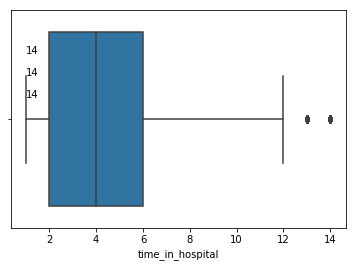

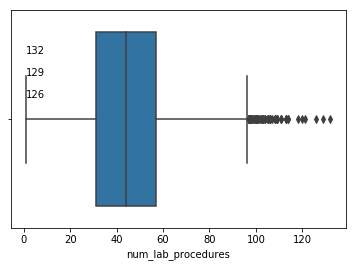

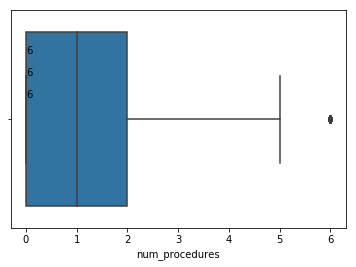

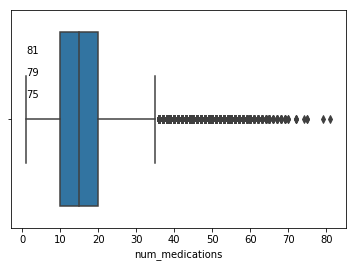

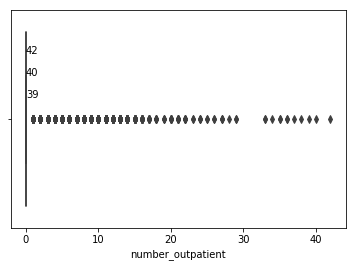

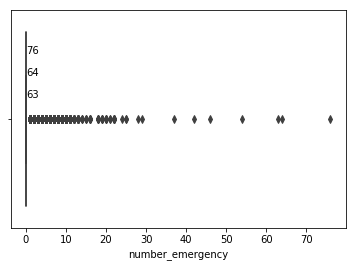

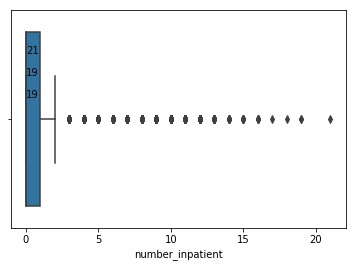

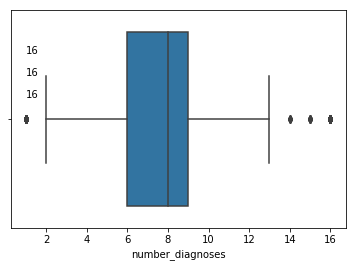

In [27]:
def visual_continious_cols():
    '''
    This function visualizes Box-and-whisker plots for continuous variables
    '''
    for i in cont_cols:
        sns.boxplot(dataIn[i])

        # Print the three highest values
        highest_vals = sorted(dataIn[i].tolist(),reverse=True)[:3]
        smallest_val = min(dataIn[i])
        
        plt.text(smallest_val, -0.3, highest_vals[0])
        plt.text(smallest_val, -0.2, highest_vals[1])
        plt.text(smallest_val, -0.1, highest_vals[2])

        plt.show()
        
visual_continious_cols()

In [28]:
# Delete observations with one of the following features higher than 99th percentile 
saved_data = dataIn
n_rows = len(dataIn)

# Continuous features with outliers of extremely large values
cols = ['num_lab_procedures', 'num_medications', 'number_outpatient', 'number_emergency','number_inpatient']

for col in cols:
    P = np.nanpercentile(saved_data[col], 99)
    dataIn = dataIn[(dataIn[col] < P)]
             
print("Removed " + str(n_rows - len(dataIn)) + " rows")

Removed 5947 rows


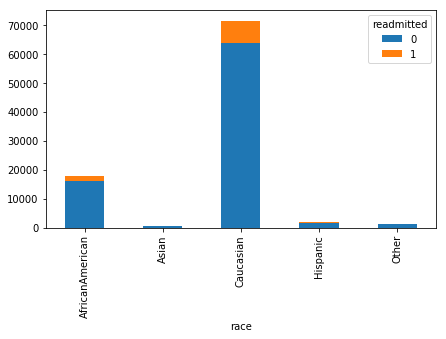

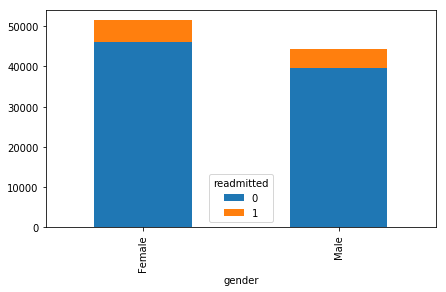

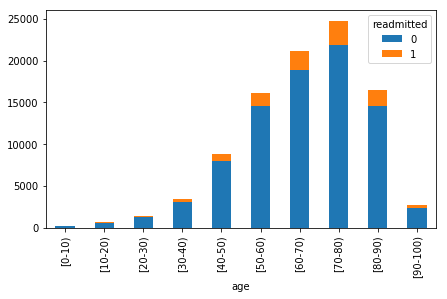